# The FitzHugh-Nagumo Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from copy import copy
from scipy.integrate import odeint
from sympy import symbols, Eq, solve
from tqdm import tqdm
%matplotlib inline

In [2]:
# FitzHugh-Nagumo parameters
a = 0.7
b = 0.8
c = 3

# neuron dynamics
def FNneuronVF(X, I):
    x, y = X
    dx = c*(y + x - x**3 / 3 + I)
    dy = -( x - a + b*y)/c
    return dx, dy

In [3]:
def phaseplane_and_nullclines(I, t_span):
    plt.figure(figsize=(16,5))
    plt.subplot(121)
    V, n = symbols('V n')
    eq1, eq2 = FNneuronVF([V, n], I)
    Vs = np.arange(-2.5, 2.5, 0.5)
    ns1 = []
    ns2 = []
    for v in tqdm(Vs):
        eq = Eq(eq1.subs(V, v), 0)
        sol1 = solve(eq,n)
        ns1.append(sol1)
        eq = Eq(eq2.subs(V, v), 0)
        sol2 = solve(eq,n)
        ns2.append(sol2)
    plt.plot(Vs, ns1)
    plt.plot(Vs, ns2)
    plt.title('$Nullclines$', fontsize=20)
    plt.xlabel('$Voltage (mV)$', fontsize=15)
    plt.ylabel('$n$', fontsize=15)
    plt.subplot(122)
    for i in tqdm(np.arange(-4, 5, 0.5)):
        for j in np.arange(-1.5, 2, 0.2):
            X0 = [i, j]
            X = odeint(lambda X,t: FNneuronVF(X, I), X0, t_span)
            V, n = X.T
            plt.plot(V, n, color='blue')
    plt.title('$Phase Plane$', fontsize=20)
    plt.xlabel('$Voltage (mV)$', fontsize=15)
    plt.ylabel('$n$', fontsize=15)

### 1 & 2 :

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:01<00:00,  9.74it/s]


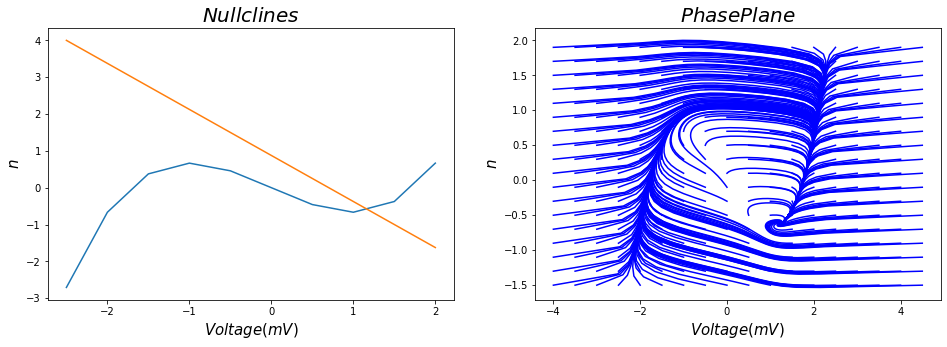

In [4]:
t_span = np.arange(1e-6, 100.0, 0.1) # time span
I = 0 # external current
phaseplane_and_nullclines(I, t_span)

---
<div align=center><font  size="4" color='grey'>end</font></div>

---